# Thesis Preliminary Analysis
----------------------------
This is preliminary analysis for Sydney Bolim Son's thesis.

## Research Purpose and Hypothesis
------------------------------
This research proposes to analyze comments in New York Times finance section to provide additional literature on gender-based differences to finance.

The research hypothesizes that women are tend to participate less, and even if they do participate, their participation is less appreciated compared to men. Through this, the research aims to depict societal bias about women's participation in finance.

To prove the hypothesis, the research will utilize comments from the New York Times Business section and focus on three key variables:

1. Number of total recommendation (dependent variable, a proxy measure for 'acceptance')
2. Gender (independent variable, use comment handle as proxy for gender, use nltk library for male/female names; abbreviations(i.e. MLK) are noted as neutral)
3. NYTimes endorsement (independent variable, proxy for comment 'quality')
4. How fast the person has commented (utilize timestamp)
5. Overall popularity of the article (use total number of comments)

Note: Link to NYTimes endorsement information is available [here]('https://help.nytimes.com/hc/en-us/articles/115014792387-Comments'). NYT Picks are a selection of comments that represent a range of views and are judged the most interesting or thoughtful. In some cases, NYT Picks may be selected to highlight comments from a particular region, or readers with first-hand knowledge of an issue.

In [45]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from scipy import stats

In [2]:
os.getcwd() # check directory

'C:\\Users\\bolim\\Desktop\\Thesis\\src'

In [3]:
# Read in the data
d = pd.read_csv('ETAdata2.csv')
# Check data
d.info()
d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 12 columns):
userName         851 non-null object
splitName        850 non-null object
comment          851 non-null object
n_recommend      851 non-null int64
n_reply          851 non-null int64
nyt_select       851 non-null bool
recommendflag    851 non-null int64
url              851 non-null object
ttlCommentNum    851 non-null int64
gender           851 non-null float64
time             851 non-null object
time_order       851 non-null int64
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 74.1+ KB


,userName,splitName,comment,n_recommend,n_reply,nyt_select,recommendflag,url,ttlCommentNum,gender,time,time_order
0,AB,AB,This is when it hurts us not having a competen...,1046,7,False,0,https://www.nytimes.com/2020/03/09/business/st...,1496,2.0,2020-03-09 06:46:01,1
1,Mark,Mark,Our illustrious commander-in-chief was all too...,1183,17,False,0,https://www.nytimes.com/2020/03/09/business/st...,1496,0.0,2020-03-09 06:58:13,2
2,Nomind7,Nomind,This is when it hurts us not having universal ...,1046,33,False,0,https://www.nytimes.com/2020/03/09/business/st...,1496,2.0,2020-03-09 06:59:10,3
3,Michael,Michael,Oil prices falling is a symptom of demand fall...,136,4,False,0,https://www.nytimes.com/2020/03/09/business/st...,1496,0.0,2020-03-09 07:19:59,4
4,Larry,Larry,Virus at my daughters school in Boston. I have...,68,2,False,0,https://www.nytimes.com/2020/03/09/business/st...,1496,0.0,2020-03-09 07:29:30,5


## Descriptive Summary Statistics
-------------
Below are some key descriptive statistics.

As of March 26, I have gathered 851 comments from the New York Times Business section. I can increase the number of observations by collecting  more data - but as this is a preliminary analysis, for now, I will use 850 comments gathered from 9 different articles on Business section. 

* __Dependent Variable: Number of Recommendations__

In [4]:
d['n_recommend'].describe() # summary statistics

count     851.000000
mean       67.005875
std       195.833570
min         0.000000
25%        10.000000
50%        21.000000
75%        44.000000
max      2570.000000
Name: n_recommend, dtype: float64

In [5]:
n_rec_array = np.asarray(d['n_recommend']) # set as numpy array for visualizations

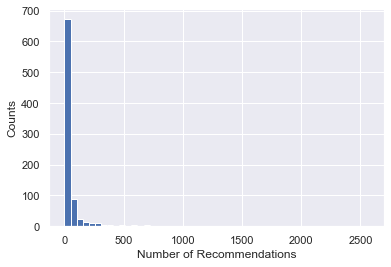

In [6]:
# Plain histogram to show the distribution
sns.set()
_ = plt.hist(n_rec_array, bins = 50)
_ = plt.xlabel('Number of Recommendations')
_ = plt.ylabel('Counts')
plt.show()

Descriptive statistics show that the number of recommendations does not have a normal distribution. To make the values more even, it will be logged.

In [7]:
n_rec_log = np.log(n_rec_array + 1)

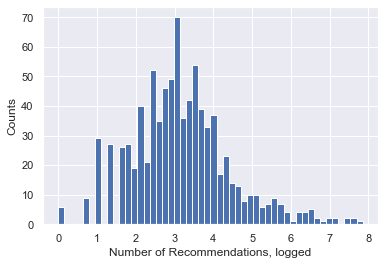

In [8]:
_ = plt.hist(n_rec_log, bins = 50)
_ = plt.xlabel('Number of Recommendations, logged')
_ = plt.ylabel('Counts')
plt.show()

In [13]:
stats.describe(n_rec_log)

DescribeResult(nobs=851, minmax=(0.0, 7.852050207265889), mean=3.1685673351067876, variance=1.596231172113152, skewness=0.5923286568603225, kurtosis=0.9243574782767507)

Logging the data makes the data to have more normal distribution. Since the preliminary analysis model will use linear regression, the logged value will be used.

In [31]:
d['n_rec_log'] = n_rec_log

* __Independent variable: Gender__

In [21]:
d.groupby(['gender']).size()

gender
0.0    368
1.0     72
2.0    411
dtype: int64

0 is male, 1 is female and 2 is unknown. There are significant less number of women who write comments in the first place.

In [29]:
df = d.groupby(['gender', 'url']).size().reset_index(name = 'count')
df.pivot(index = 'url', columns = 'gender', values = 'count')

gender,0.0,1.0,2.0
url,,,
https://www.nytimes.com/2020/02/18/business/dealbook/michael-bloomberg-wall-street.html,62,13,50
https://www.nytimes.com/2020/02/26/technology/personaltech/ubereats-doordash-postmates-grubhub-review.html,51,17,57
https://www.nytimes.com/2020/03/03/business/coronavirus-business-travel.html,14,5,15
https://www.nytimes.com/2020/03/05/business/boeing-david-calhoun.html,58,8,59
https://www.nytimes.com/2020/03/06/business/economy/jobs-report.html,42,9,64
https://www.nytimes.com/2020/03/09/business/stock-market-today.html,59,7,59
https://www.nytimes.com/2020/03/09/upshot/coronavirus-oil-prices-bond-yields-recession.html,50,8,67
https://www.nytimes.com/2020/03/23/technology/coronavirus-facebook-amazon-youtube.html,12,2,17
https://www.nytimes.com/2020/03/23/technology/coronavirus-surveillance-tracking-privacy.html,20,3,23


Some comments have very low number for 'female'. To solve this, it shows that there needs to be more data gathering.

* __Possible Confounding 1: Comment order__

If someone posted his/her comment earlier than anyone else, his/her comment may have more number of recommendations.

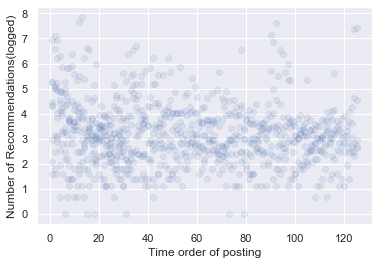

In [40]:
_ = plt.scatter(x = 'time_order', y = 'n_rec_log', data = d, alpha = 0.1)
_ = plt.xlabel('Time order of posting')
_ = plt.ylabel('Number of Recommendations(logged)')
plt.show()

The plot shows that time order of posting does not have much relevance with number of recommendations, which clears out possibility as a confounding factor.

* __Possible Confounding 2: NY Times Endorsement__

If someone posted his/her comment endorsed by NY Times, his/her comment may have more number of recommendations.

In [43]:
logged = d.groupby(['nyt_select'])['n_rec_log'].mean()
naive = d.groupby(['nyt_select'])['n_recommend'].mean()

print(logged, naive)

nyt_select
False    3.081533
True     5.726764
Name: n_rec_log, dtype: float64 nyt_select
False     48.872418
True     600.000000
Name: n_recommend, dtype: float64


This shows that NY times endorsement is very related to receving more/less recommendations.

* __Linearity Assumptions__ 

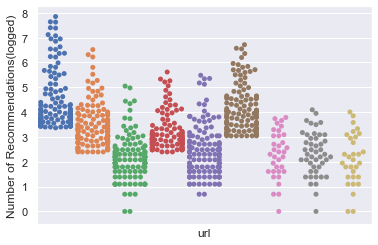

In [33]:
# Is distribution affected by article?
_ = sns.swarmplot(x = 'url', y = 'n_rec_log', data = d)
_ = plt.xticks([])
_ = plt.ylabel('Number of Recommendations(logged)')
plt.show()

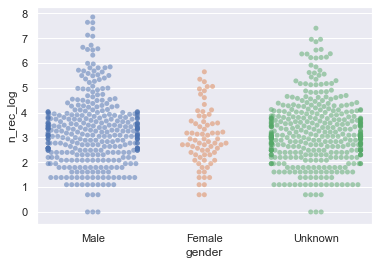

In [34]:
# Is distribution affected by gender?
_ = sns.swarmplot(x = 'gender', y = 'n_rec_log', alpha = 0.5, data = d)
_ = plt.xticks(np.arange(3), ('Male', 'Female', 'Unknown'))
plt.show()

In [35]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [37]:
men_nrec_array = np.asarray(d.loc[d['gender'] == 0]['n_rec_log'])
women_nrec_array = np.asarray(d.loc[d['gender'] == 1]['n_rec_log'])
neut_nrec_array = np.asarray(d.loc[d['gender'] == 2]['n_rec_log'])

x_men, y_men = ecdf(men_nrec_array)
x_women, y_women = ecdf(women_nrec_array)
x_neut, y_neut = ecdf(neut_nrec_array)

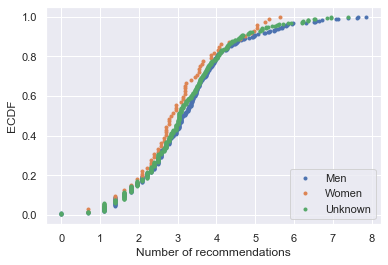

In [38]:
# Generate plot
_ = plt.plot(x_men, y_men, marker = '.', linestyle = 'none')
_ = plt.plot(x_women, y_women, marker = '.', linestyle = 'none')
_ = plt.plot(x_neut, y_neut, marker = '.', linestyle = 'none')

# Label the axes
_ = plt.xlabel('Number of recommendations')
_ = plt.ylabel('ECDF')

# legend
plt.legend(('Men', 'Women', 'Unknown'), loc='lower right')

# Display the plot
plt.show()

Regardless of gender, number of recommendations generally have normal distribution. 

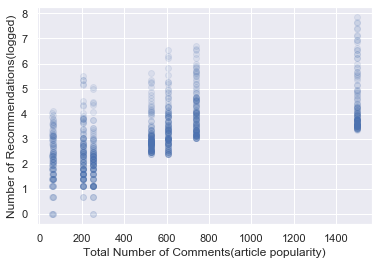

In [44]:
# Is article popularity relevant with the total number of recommendations?

_ = plt.scatter(x = 'ttlCommentNum', y = 'n_rec_log', data = d, alpha = 0.1)
_ = plt.xlabel('Total Number of Comments(article popularity)')
_ = plt.ylabel('Number of Recommendations(logged)')
plt.show()

## Vanilla Model (Linear Regression)
--------------------

Below is the result of simple linear regression that takes three arguments:

1) Number of Recommendations, logged (dependent variable)

2) Gender (independent variable)

3) NYTimes endorsement (possible confounding)

4) Article popularity (possible confounding) -> maybe include or not

In [47]:
from statsmodels.formula.api import ols

fit1 = ols('n_rec_log ~ C(gender) + C(nyt_select)', data = d).fit()

fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_rec_log   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     46.53
Date:                Thu, 26 Mar 2020   Prob (F-statistic):           7.72e-28
Time:                        15:56:01   Log-Likelihood:                -1341.1
No. Observations:                 851   AIC:                             2690.
Df Residuals:                     847   BIC:                             2709.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.1338      0.062     50.833      0.000       3.013       3.255
C(gender)[T.1.0]         -0.1848      0.151     -1.222      0.222      -0.482       0.112
C(gender)[T.2.0]         -0.0753      0.084     -0.894      0.371      -0.240       0.090
C(nyt_select)[T.True]     2.6372      0.225     11.696      0.000       2.195       3.080
==============================================================================
Omnibus:                       30.507   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.041
Skew:                           0.401   Prob(JB):                     1.49e-08
Kurtosis:                       3.611   Cond. No.                         6.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
from statsmodels.formula.api import ols

fit2 = ols('n_rec_log ~ C(gender) + C(nyt_select) + ttlCommentNum', data = d).fit()

fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_rec_log   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     187.6
Date:                Thu, 26 Mar 2020   Prob (F-statistic):          4.53e-115
Time:                        15:57:01   Log-Likelihood:                -1135.8
No. Observations:                 851   AIC:                             2282.
Df Residuals:                     846   BIC:                             2305.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.1731      0.064     33.902      0.000       2.047       2.299
C(gender)[T.1.0]         -0.0063      0.119     -0.053      0.958      -0.240       0.228
C(gender)[T.2.0]         -0.0224      0.066     -0.339      0.735      -0.152       0.107
C(nyt_select)[T.True]     2.2458      0.178     12.611      0.000       1.896       2.595
ttlCommentNum             0.0016   7.17e-05     22.902      0.000       0.002       0.002
==============================================================================
Omnibus:                       58.989   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.562
Skew:                           0.627   Prob(JB):                     1.75e-16
Kurtosis:                       3.688   Cond. No.                     4.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
from statsmodels.formula.api import ols

fit3 = ols('n_rec_log ~ C(gender) + C(nyt_select) + time_order', data = d).fit()

fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_rec_log   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     43.23
Date:                Thu, 26 Mar 2020   Prob (F-statistic):           4.94e-33
Time:                        16:04:22   Log-Likelihood:                -1326.9
No. Observations:                 851   AIC:                             2664.
Df Residuals:                     846   BIC:                             2687.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.4614      0.086     40.209      0.000       3.292       3.630
C(gender)[T.1.0]         -0.1862      0.149     -1.252      0.211      -0.478       0.106
C(gender)[T.2.0]         -0.0753      0.083     -0.909      0.364      -0.238       0.087
C(nyt_select)[T.True]     2.8438      0.225     12.629      0.000       2.402       3.286
time_order               -0.0059      0.001     -5.364      0.000      -0.008      -0.004
==============================================================================
Omnibus:                       11.082   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.799
Skew:                           0.194   Prob(JB):                      0.00166
Kurtosis:                       3.458   Cond. No.                         384.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
from statsmodels.formula.api import ols

fit4 = ols('n_rec_log ~ C(gender) * C(nyt_select) + time_order', data = d).fit()

fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_rec_log   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     29.40
Date:                Thu, 26 Mar 2020   Prob (F-statistic):           4.51e-32
Time:                        16:04:39   Log-Likelihood:                -1325.2
No. Observations:                 851   AIC:                             2664.
Df Residuals:                     844   BIC:                             2698.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  3.4437      0.087     39.696      0.000       3.273       3.614
C(gender)[T.1.0]                          -0.1541      0.150     -1.028      0.304      -0.448       0.140
C(gender)[T.2.0]                          -0.0546      0.084     -0.648      0.517      -0.220       0.111
C(nyt_select)[T.True]                      3.2012      0.327      9.795      0.000       2.560       3.843
C(gender)[T.1.0]:C(nyt_select)[T.True]    -1.7566      1.207     -1.456      0.146      -4.125       0.612
C(gender)[T.2.0]:C(nyt_select)[T.True]    -0.5929      0.452     -1.311      0.190      -1.481       0.295
time_order                                -0.0058      0.001     -5.280      0.000      -0.008      -0.004
==============================================================================
Omnibus:                       11.601   Durbin-Watson:                   0.736
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.605
Skew:                           0.196   Prob(JB):                      0.00111
Kurtosis:                       3.480   Cond. No.                     2.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
import math
print('Impact of NYT endorsement for male is:', math.exp(3.2012)) # male
print('Impact of NYT endorsement for female is:', math.exp(3.2012-1.7566)) # females
print('Impact of NYT endorsement for unknown is:', math.exp(3.2012-0.5929)) # unknown

Impact of NYT endorsement for male is: 24.561986903835113
Impact of NYT endorsement for female is: 4.2401557412662365
Impact of NYT endorsement for unknown is: 13.575952104880667


* __Analysis__

All models show that if the biggest impact to total number of comments is NY Times endorsement. Total number of comments (article popularity) is not that relevant. When he/she commented it (time_order) is more important.

All models show that male gender is more appreciated - they get more comments than women, or not-specified gender. In naive models without interaction, P-values associated with the gender are not big.

I added interaction term in model4 to see how gender and NY Times endorsement work. The result showed that effect of NY Times endorsement is greatest in males, then by unknown gender. Female has the least impact. This is coherent with the hypothesis that women are less appreciated in business commentaries.

## Limitations
------------------------

The research has major limitations. First is using comments only from one news article source, the New York Times. Even though the New York Times is widely popular, the New York Times has limitations as an estimate for the total population.

Second, name extracted from comment handle is used as a proxy for gender, but that may not be always correct. Names in English are gender specific, but for those who used non-English names as their handle, gender may not be detected. In other words, a clearly masculine/feminine name in non-latin languages may be classified as "gender unknown". 

Third, to make the argument that female gender is less appreciated in finance, I gathered comments only from the Business section. To make the research more robust, I plan to later add random articles from the Times that are _not_ in the Business section. The random articles will serve as the population for comments; I will then add an interaction to see if the impact of gender is greater in the Business section.